In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
q="TGGAAAG"
t="TCTAGCG"

In [8]:
x = 4
o = 5
e = 1

In [219]:
def visualize_matrices(q,t,M,I,D):
    # visualize matrices using seaborn heatmap and putting the strings as labels
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    for i, matrix in enumerate([M,I,D]):
        sns.heatmap(matrix,annot=True,fmt=".0f",ax=ax[i],cbar=False, vmin=0, vmax=20)
        ax[i].set_xlabel("t")
        ax[i].set_ylabel("q")
        ax[i].set_xticklabels([""]+list(t))
        ax[i].set_yticklabels([""]+list(q), rotation=0)
        

    ax[0].set_title("M")
    ax[1].set_title("I")
    ax[2].set_title("D")
    plt.show()

In [220]:
def swg(q,t):
    # initialization
    M = np.zeros((len(q)+1,len(t)+1),dtype=float)
    I = np.zeros((len(q)+1,len(t)+1),dtype=float)
    D = np.zeros((len(q)+1,len(t)+1),dtype=float)
    # set all matrices to None
    M[:,:] = I[:,:] = D[:,:] = None
    M[0,0] = I[0,0] = D[0,0] = 0
    for v in range(1,len(q)+1):
        M[v,0] = M[0,v] = np.inf
        # set the first column of I to inf
        I[v,0] = np.inf
        I[0,v] = o + (v-1)*e
        
        D[0,v] = np.inf
        D[v,0] = o + (v-1)*e

    visualize_matrices(q,t,M,I,D)

    for v in range(1,len(q)+1):
        for h in range(1,len(t)+1):
            if v==1 and h==1:
                print(v, h-1, M[v, h-1]+o+e, I[v,h-1]+e)
            I[v,h] = min(M[v-1, h]+o+e, I[v-1,h]+e)
            D[v,h] = min(M[v, h-1]+o+e, D[v,h-1]+e)
            if q[v-1] != t[h-1]:
                M[v,h] = min(M[v-1,h-1]+x,I[v,h],D[v,h])
            else:
                M[v,h] = min(M[v-1,h-1],I[v,h],D[v,h])
        visualize_matrices(q,t,M,I,D)

In [372]:
q = "GAGATA"
t = "GATACA"

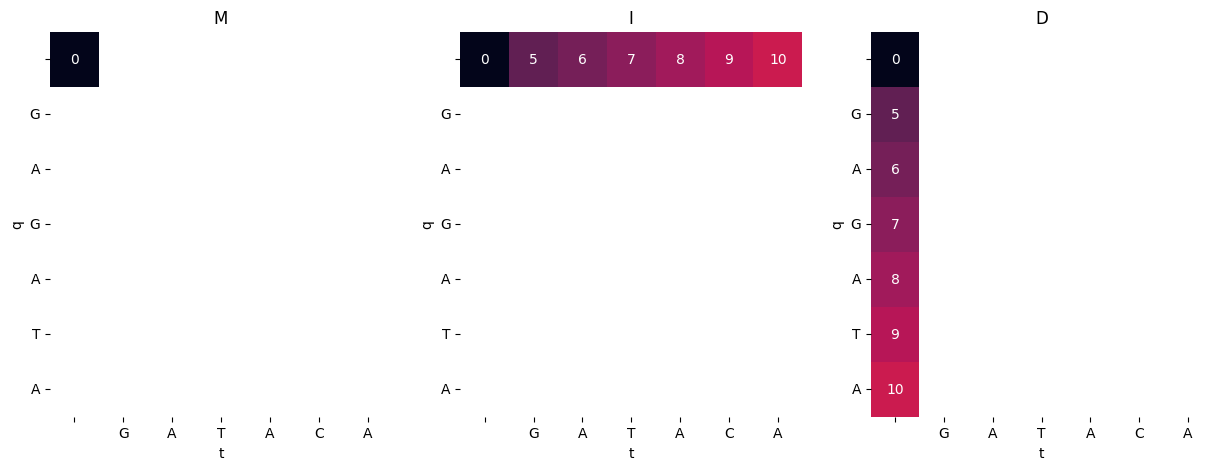

1 0 inf inf


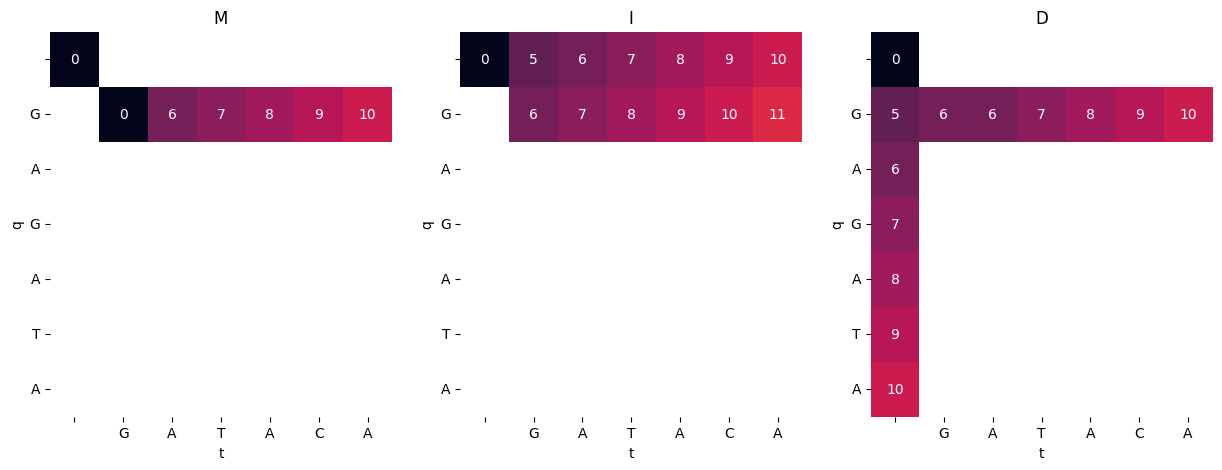

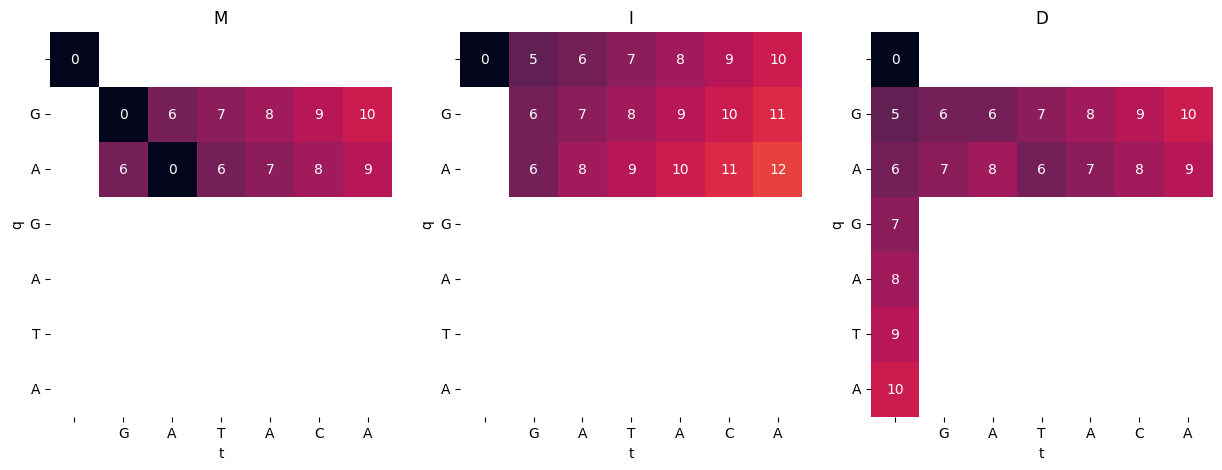

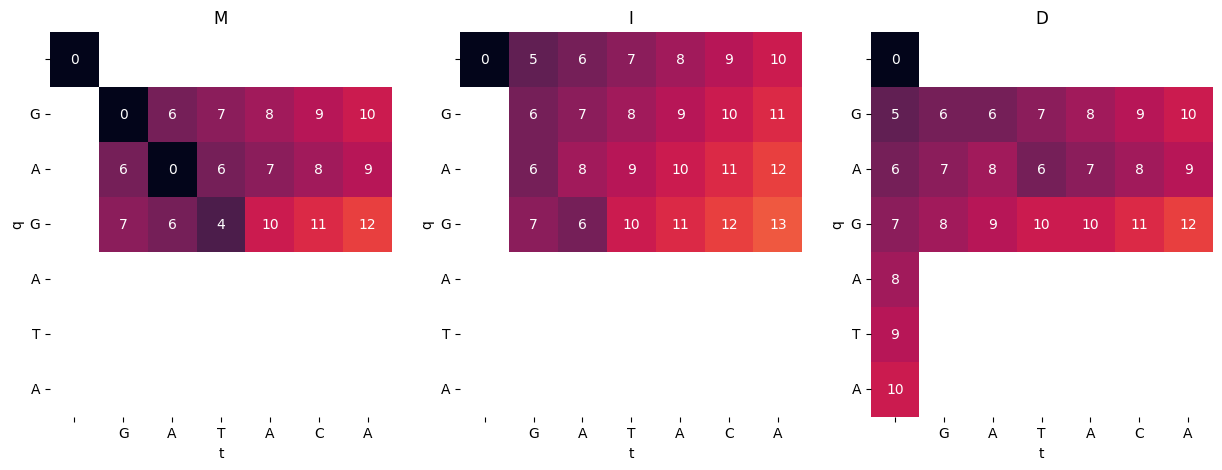

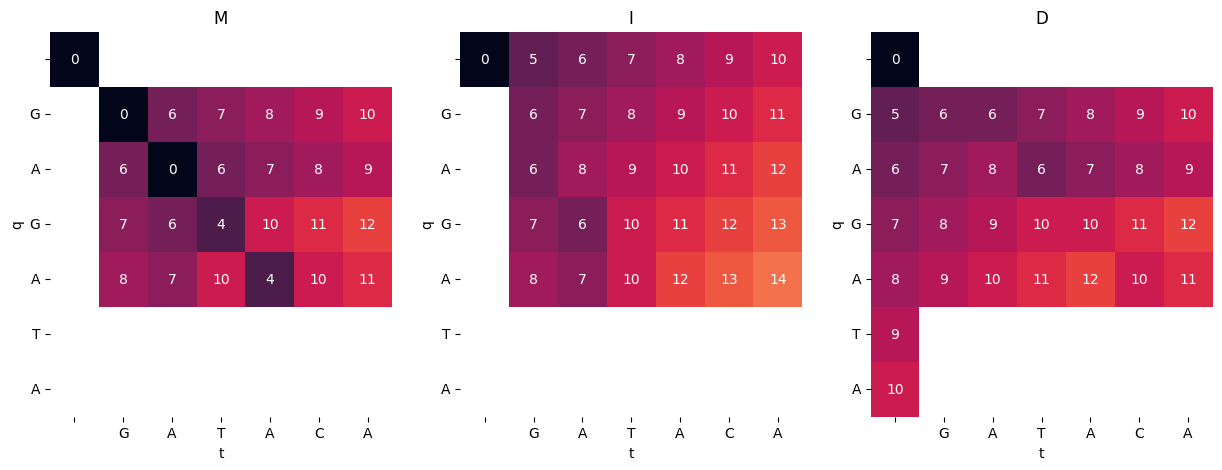

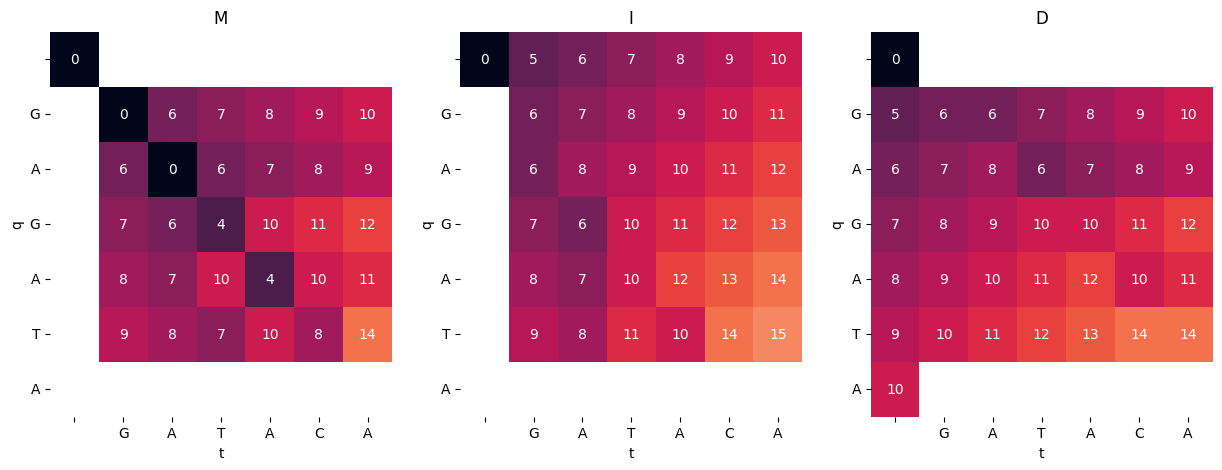

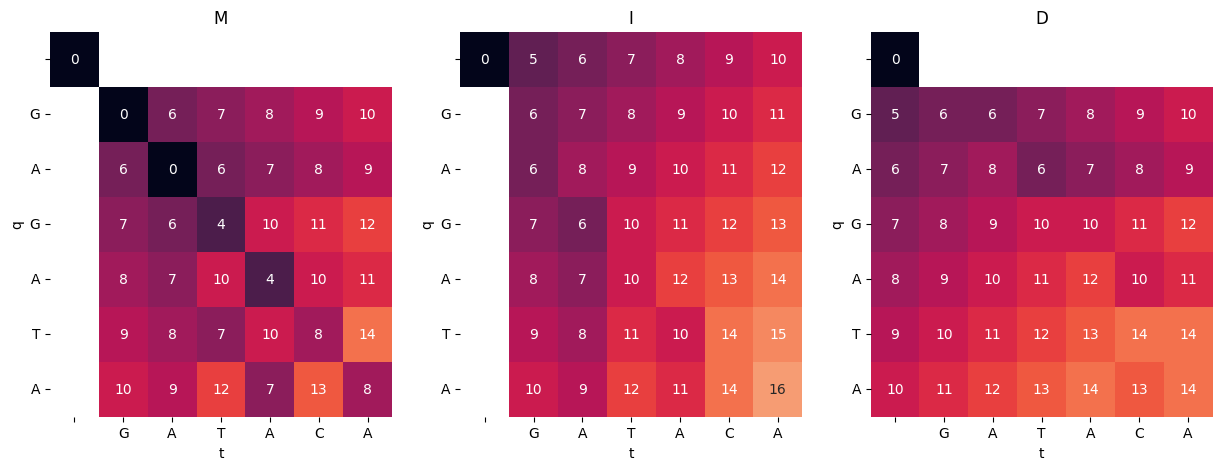

In [373]:
swg(q,t)

In [384]:
def wf_align(q,t):

    def print_wfs(s, figure, i):
        
        matrix = np.zeros((len(wf[s]['M']['offsets']),len(wf[s].keys())), dtype=float)
        #set the figure size
        print(n+m+2,i)
        ax = figure.add_subplot(1,n+m+2,i)
        for c,label in enumerate(wf[s].keys()):
            offsets = wf[s][label]['offsets']
            matrix[:,c] = np.hstack([offsets[m:-1],offsets[:n+1]])
        sns.heatmap(matrix,annot=True,fmt=".0f",cbar=False, vmin=0, vmax=20, ax=ax)
        ax.set_xlabel("component")
        ax.set_ylabel("k")
        ax.set_yticks([k+0.5 for k in range(0,len(offsets))], labels=[k for k in range(-m,+n+1)])
        ax.set_xticks([0.5,1.5,2.5],labels=['M','I','D'])
        ax.set_title(f"WF_{s}")
        
            

    def wf_extend(s, plot=True):
        if plot:
            figure = plt.figure(figsize=(5,2))
            i=1
        for k in range(wf[s]['M']['lo'],wf[s]['M']['hi']+1):
            
            v = int(wf[s]['M']['offsets'][k] - k)
            h = int(wf[s]['M']['offsets'][k])            
            while v<len(q) and h<len(t) and q[v]==t[h]:
                wf[s]['M']['offsets'][k] = wf[s]['M']['offsets'][k] + 1
                v = v + 1
                h = h + 1
                if plot:
                    print_wfs(s, figure, i)
                    i = i + 1
        if plot:
            plt.title(f"WF_{s} extension")
            plt.show()

    def init_wf(s, use_prev=True):
        # if use_prev and (s-x in wf.keys()):
        #     wf[s] = wf[s-x].copy()
        # else:
        wf[s] = {'M':{}, 'I':{}, 'D':{}}
        offsets_len = n+m+1
        wf[s]['M']['offsets'] = np.full(offsets_len, -np.inf, dtype=float)
        wf[s]['D']['offsets'] = np.full(offsets_len, -np.inf, dtype=float)
        wf[s]['I']['offsets'] = np.full(offsets_len, -np.inf, dtype=float)

        wf[s]['M']['lo'] = wf[s]['D']['lo'] = wf[s]['I']['lo'] = 0
        wf[s]['M']['hi'] = wf[s]['D']['hi'] = wf[s]['I']['hi'] = 0

        # wf[s]['M']['offsets'][0] = 0

    def wf_next(s):
        init_wf(s)

        # if (wf[s-x]['M']['offsets'][wf[s-x]['M']['hi']+1]!=-np.inf) or \
        #     (wf[s-o-e]['M']['offsets'][wf[s-o-e]['M']['hi']+1] != -np.inf) or \
        #     (wf[s-e]['I']['offsets'][wf[s-e]['I']['hi']+1] != -np.inf) or \
        #     (wf[s-e]['D']['offsets'][wf[s-e]['D']['hi']+1] != -np.inf):
        #     hi = max(wf[s-x]['M']['hi'],
        #              wf[s-o-e]['M']['hi'],
        #              wf[s-e]['I']['hi'],
        #              wf[s-e]['D']['hi']) + 1
        # else:
        #     hi = 0
        
        # if (wf[s-x]['M']['offsets'][wf[s-x]['M']['lo']-1]!=-np.inf) or \
        #     (wf[s-o-e]['M']['offsets'][wf[s-o-e]['M']['lo']-1] != -np.inf) or \
        #     (wf[s-e]['I']['offsets'][wf[s-e]['I']['lo'] -1] != -np.inf) or \
        #     (wf[s-e]['D']['offsets'][wf[s-e]['D']['lo']-1] != -np.inf):

        #     lo = min(wf[s-x]['M']['lo'],wf[s-o-e]['M']['lo'],wf[s-e]['I']['lo'],wf[s-e]['D']['lo']) - 1
        # else:
        #     lo = 0
        

        hi = max(wf[s-x]['M']['hi'], wf[s-o-e]['M']['hi'], wf[s-e]['I']['hi'], wf[s-e]['D']['hi']) + 1
        lo = min(wf[s-x]['M']['lo'], wf[s-o-e]['M']['lo'], wf[s-e]['I']['lo'],wf[s-e]['D']['lo']) - 1

        print(hi,lo)
        # figure = plt.figure(figsize=(20,5))
        # i=1
        for k in range(lo, hi+1):
            wf[s]['I']['offsets'][k] = max(wf[s-o-e]['M']['offsets'][k-1], wf[s-e]['I']['offsets'][k-1]) + 1
            wf[s]['D']['offsets'][k] = max(wf[s-o-e]['M']['offsets'][k+1], wf[s-e]['D']['offsets'][k+1])
            wf[s]['M']['offsets'][k] = max(wf[s-x]['M']['offsets'][k]+1, wf[s]['I']['offsets'][k], wf[s]['D']['offsets'][k])
            # print_wfs(s, figure, i)
            # i = i + 1
        # plt.title(f"WF_{s} next")
        # plt.show()

        # Equation 3
        wf[s]['M']['hi'] = wf[s]['D']['hi'] = wf[s]['I']['hi'] = hi
        wf[s]['M']['lo'] = wf[s]['D']['lo'] = wf[s]['I']['lo'] =  lo
        


    wf = {}
    DP_matrices = {'M': np.full((len(q)+1,len(t)+1),-np.inf), 'I': np.full((len(q)+1,len(t)+1),-np.inf), 'D': np.full((len(q)+1,len(t)+1),-np.inf)}
    # diagonal and offset to (n,m)
    n = len(q)
    m = len(t)

    Ak = m-n
    Aoffset = m

    s = 0

    for s in range(-o-e,1):
        init_wf(s, use_prev=False)
        wf[s]['M']['offsets'][0] = 0

    def assign_matrix_values(matrix_name, s):
        for k in range(wf[s][matrix_name]['lo'], wf[s][matrix_name]['hi']+1):
            try:
                v = int(wf[s][matrix_name]['offsets'][k] - k)+1
                h = int(wf[s][matrix_name]['offsets'][k])+1
                DP_matrices[matrix_name][v,h] = s
            except:
                pass

    while True:
        wf_extend(s)
        for matrix_name in ['M','I','D']:
            assign_matrix_values(matrix_name, s)
        
        visualize_matrices(q,t,DP_matrices['M'],DP_matrices['I'],DP_matrices['D'])

        print(wf[s]['M']['offsets'][Ak], Aoffset)
        if wf[s]['M']['offsets'][Ak] >= Aoffset:
            break
        # assign the scor values to the DP matrix
        
        s = s + 1
        wf_next(s)



14 1
14 2


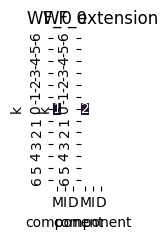

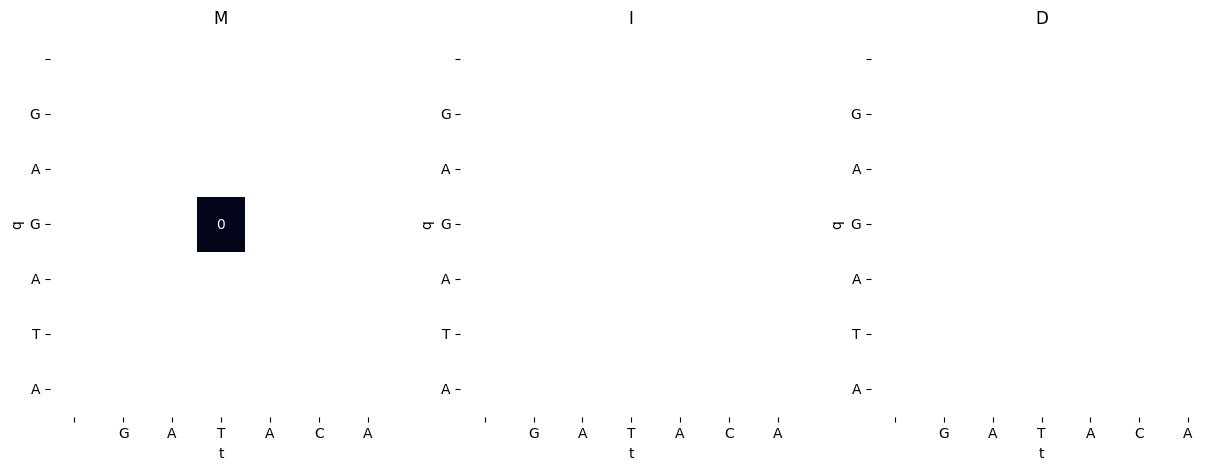

2.0 6
1 -1
14 1


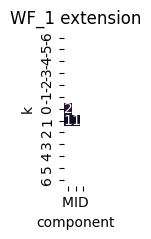

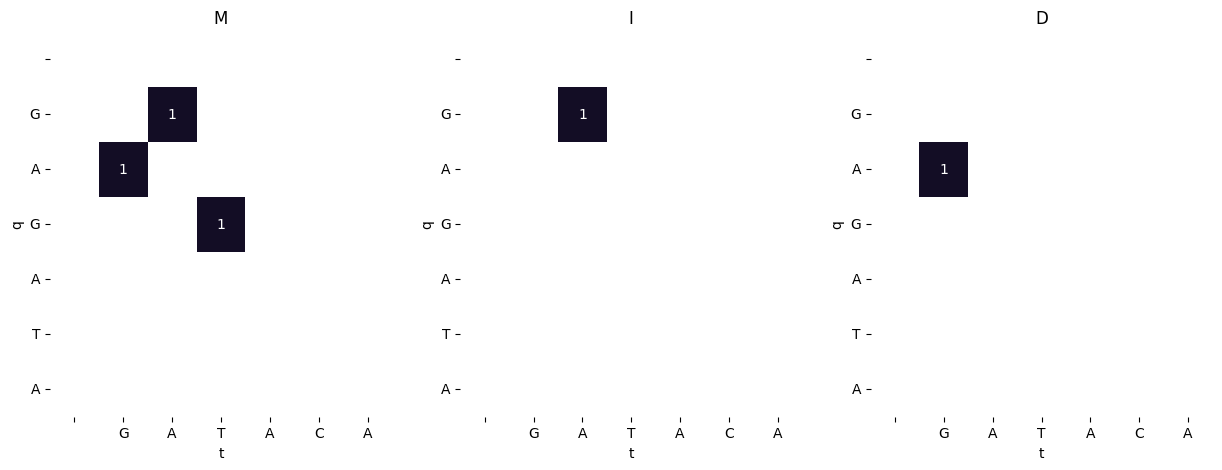

2.0 6
2 -2
14 1
14 2
14 3
14 4


IndexError: string index out of range

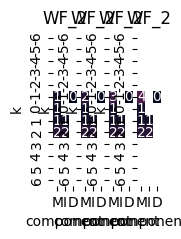

In [385]:
wf_align(q,t)